In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_pickle(r'./../data/AtlasCleaned.pkl')
df.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
0,01001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,18.8,1
1,01003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,19.6,1
2,01005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,45.2,0
3,01007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,29.3,1
4,01009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,22.2,1


In [3]:
df.drop(labels=['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15', 'LACCESS_LOWI10', 'LACCESS_LOWI15',
                    'PCH_LACCESS_LOWI_10_15', 'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15',
                    'LACCESS_SNAP15', 'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 
                    'LACCESS_SENIORS10', 'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15', 'LACCESS_WHITE15', 
                    'LACCESS_BLACK15', 'LACCESS_HISP15', 'LACCESS_NHASIAN15', 'LACCESS_NHNA15', 
                    'LACCESS_NHPI15', 'LACCESS_MULTIR15'], axis=1, inplace=True)

df10_cols = ['PCT_LACCESS_POP10', 'PCT_LACCESS_LOWI10', 'PCT_LACCESS_HHNV10',
             'PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10', 'PCT_FREE_LUNCH10', 'PCT_REDUCED_LUNCH10',
             'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
             'PCT_65OLDER10', 'PCT_18YOUNGER10',
             'GROCPTH11', 'SUPERCPTH11', 'CONVSPTH11', 'SPECSPTH11', 
             'SNAPSPTH12', 'FFRPTH11', 'FSRPTH11', 'PC_FFRSALES07','PC_FSRSALES07', 'PCT_SNAP12', 
             'SNAP_PART_RATE11', 'PCT_NSLP12','PCT_SBP12', 'PCT_SFSP12',
             'FDPIR12','FOODINSEC_12_14','VLFOODSEC_12_14','DIRSALES_FARMS07', 'FMRKTPTH13']

df15_cols = ['PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_HHNV15', 
             'PCT_LACCESS_SNAP15', 'PCT_LACCESS_CHILD15', 'PCT_LACCESS_SENIORS15', 'PCT_LACCESS_WHITE15',
             'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15', 'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 
             'PCT_LACCESS_NHPI15', 'PCT_LACCESS_MULTIR15', 'PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15', 
             'GROCPTH16', 'SUPERCPTH16', 'CONVSPTH16', 'SPECSPTH16', 'SNAPSPTH17', 'FFRPTH16', 'FSRPTH16',
             'PC_FFRSALES12', 'PC_FSRSALES12', 'PCT_SNAP17','SNAP_PART_RATE16', 'PCT_NSLP17', 'PCT_SBP17', 'PCT_SFSP17',
             'FDPIR15', 'FOODINSEC_15_17','VLFOODSEC_15_17', 'DIRSALES_FARMS12', 'FMRKTPTH18']
# Foodhub, metro 13, medhincome 15 'POVRATE15' are not here

In [4]:
df10 = pd.DataFrame(df, columns = df10_cols)
df15 = pd.DataFrame(df, columns = df15_cols)

df10.rename(columns = lambda x : str(x)[:-2], inplace=True)
df15.rename(columns = lambda x : str(x)[:-2], inplace =True)

In [5]:
df10.drop(columns=['PCT_LACCESS_CHILD','PCT_LACCESS_SENIORS','PCT_NHWHITE', 'PCT_NHBLACK',
                       'PCT_HISP', 'PCT_NHASIAN', 'PCT_NHNA', 'PCT_NHPI', 
                       'PCT_65OLDER', 'PCT_18YOUNGER'], inplace=True)
df15.drop(columns=['PCT_LACCESS_CHILD','PCT_LACCESS_SENIORS','PCT_LACCESS_SNAP','PCT_LACCESS_WHITE',
             'PCT_LACCESS_BLACK','PCT_LACCESS_HISP', 'PCT_LACCESS_NHASIAN', 'PCT_LACCESS_NHNA', 
             'PCT_LACCESS_NHPI', 'PCT_LACCESS_MULTIR', 'PCT_LACCESS_SNAP'], inplace=True)

In [6]:
df10.rename(columns={'FOODINSEC_12_': 'FOODINSEC','VLFOODSEC_12_': 'VLFOODSEC'}, inplace=True)
df15.rename(columns={'FOODINSEC_15_': 'FOODINSEC','VLFOODSEC_15_': 'VLFOODSEC'}, inplace=True)


In [7]:
df10.columns

Index(['PCT_LACCESS_POP', 'PCT_LACCESS_LOWI', 'PCT_LACCESS_HHNV',
       'PCT_FREE_LUNCH', 'PCT_REDUCED_LUNCH', 'GROCPTH', 'SUPERCPTH',
       'CONVSPTH', 'SPECSPTH', 'SNAPSPTH', 'FFRPTH', 'FSRPTH', 'PC_FFRSALES',
       'PC_FSRSALES', 'PCT_SNAP', 'SNAP_PART_RATE', 'PCT_NSLP', 'PCT_SBP',
       'PCT_SFSP', 'FDPIR', 'FOODINSEC', 'VLFOODSEC', 'DIRSALES_FARMS',
       'FMRKTPTH'],
      dtype='object')

In [8]:
df15.columns

Index(['PCT_LACCESS_POP', 'PCT_LACCESS_LOWI', 'PCT_LACCESS_HHNV',
       'PCT_FREE_LUNCH', 'PCT_REDUCED_LUNCH', 'GROCPTH', 'SUPERCPTH',
       'CONVSPTH', 'SPECSPTH', 'SNAPSPTH', 'FFRPTH', 'FSRPTH', 'PC_FFRSALES',
       'PC_FSRSALES', 'PCT_SNAP', 'SNAP_PART_RATE', 'PCT_NSLP', 'PCT_SBP',
       'PCT_SFSP', 'FDPIR', 'FOODINSEC', 'VLFOODSEC', 'DIRSALES_FARMS',
       'FMRKTPTH'],
      dtype='object')

In [9]:
# diff = df10.compare(df15)
diff = pd.DataFrame()
for c in df10.columns:
    diff[c] = df15[c]-df10[c]

In [10]:
scaler = StandardScaler()

diff = pd.DataFrame(scaler.fit_transform(diff), columns=diff.columns)

In [11]:
X = diff.drop(columns=['PCT_LACCESS_POP','PCT_LACCESS_LOWI','PCT_LACCESS_HHNV'], axis=1)
y = diff['PCT_LACCESS_POP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
model.summary()
print('R-squared:', model.rsquared)
print('P-values:', model.pvalues)

R-squared: 0.02122744699035428
P-values: const                0.716920
PCT_FREE_LUNCH       0.696828
PCT_REDUCED_LUNCH    0.857769
GROCPTH              0.211986
SUPERCPTH            0.045945
CONVSPTH             0.482173
SPECSPTH             0.427779
SNAPSPTH             0.325925
FFRPTH               0.289545
FSRPTH               0.450601
PC_FFRSALES          0.763854
PC_FSRSALES          0.441492
PCT_SNAP             0.242449
SNAP_PART_RATE       0.001517
PCT_NSLP             0.035178
PCT_SBP              0.093460
PCT_SFSP             0.058786
FDPIR                0.236457
FOODINSEC            0.245323
VLFOODSEC            0.788494
DIRSALES_FARMS       0.989146
FMRKTPTH             0.007023
dtype: float64


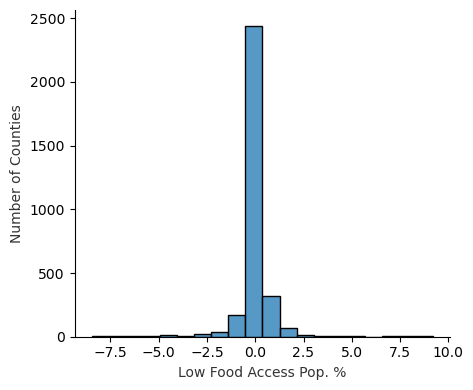

In [13]:
def plt_dis(c):
    f = sns.displot(data=diff, x=c, height=4, aspect=10/8.27, bins=20)
    plt.ylabel("Number of Counties", alpha=0.8)
    plt.xlabel("Low Food Access Pop. %", alpha=0.8)
    plt.show()

plt_dis('PCT_LACCESS_POP')

In [14]:
df_extreme = diff[diff['PCT_LACCESS_POP'] > 1.5]
df_extreme = diff[diff['PCT_LACCESS_POP'] < -1.5]
df_extreme

,PCT_LACCESS_POP,PCT_LACCESS_LOWI,PCT_LACCESS_HHNV,PCT_FREE_LUNCH,PCT_REDUCED_LUNCH,GROCPTH,SUPERCPTH,CONVSPTH,SPECSPTH,SNAPSPTH,...,PCT_SNAP,SNAP_PART_RATE,PCT_NSLP,PCT_SBP,PCT_SFSP,FDPIR,FOODINSEC,VLFOODSEC,DIRSALES_FARMS,FMRKTPTH
42,-2.366462,-2.680278,-1.636751,-2.499100,-0.256142,0.246726,-0.238160,0.829577,-0.017123,-1.151567,...,-0.058162,-0.190732,-0.678035,1.233457,1.370724,-0.039743,0.900062,0.875889,-0.314275,0.016881
257,-4.148595,-5.066821,-1.191684,0.117842,-0.690186,0.280234,-0.238160,0.110293,-0.017123,0.469292,...,0.642880,0.988669,-0.168684,0.317907,0.216310,-0.039743,-1.394243,-0.712204,-0.084582,-0.096276
271,-8.070337,-4.746892,0.325495,0.324534,2.211667,11.102097,-0.238160,0.609324,-0.017123,10.588328,...,0.642880,0.988669,-0.168684,0.317907,0.216310,-0.039743,-1.394243,-0.712204,-0.199428,-0.096276
277,-4.556236,-3.778014,-2.356076,-0.526455,1.826431,1.164183,-0.238160,0.509000,-0.017123,0.145678,...,0.642880,0.988669,-0.168684,0.317907,0.216310,-0.039743,-1.394243,-0.712204,-0.429122,-0.096276
284,-7.585401,-3.760741,0.512101,-1.187650,7.400535,-12.182596,-0.238160,-0.410359,-0.017123,-0.153477,...,0.642880,0.988669,-0.168684,0.317907,0.216310,-0.039743,-1.394243,-0.712204,-0.142005,22.351332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,-1.902056,-1.113694,0.349551,-0.797684,-0.522476,1.394108,-0.238160,-0.605931,-0.017123,-1.331846,...,0.195161,-0.608686,-0.425485,0.438362,0.363489,-0.039743,-0.452989,-1.933813,-0.084582,0.061745
2927,-1.573582,-0.910582,-1.695514,0.228453,-0.198787,-1.336248,-0.574396,-0.489473,1.747181,0.559895,...,0.195161,-0.608686,-0.425485,0.438362,0.363489,-0.039743,-0.452989,-1.933813,-0.084582,-0.124744
3058,-1.960820,-1.766126,-2.345901,-0.323130,0.088124,-0.317117,-0.095149,-0.230013,3.337706,-0.061516,...,-0.219835,-0.149039,-1.978704,-0.227136,-2.120452,-0.039743,0.958891,1.364532,-1.979553,-0.070182
3065,-2.853379,-3.438906,-0.623074,0.529819,0.154846,0.138704,-0.238160,-2.302942,-0.017123,2.913699,...,-0.219835,-0.149039,-1.978704,-0.227136,-2.120452,-0.039743,0.958891,1.364532,0.030265,-0.096276


In [15]:
X = df_extreme.drop(columns=['PCT_LACCESS_POP','PCT_LACCESS_LOWI','PCT_LACCESS_HHNV'], axis=1)
y = df_extreme['PCT_LACCESS_POP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
model.summary()
print('R-squared:', model.rsquared)
print('P-values:', model.pvalues)

R-squared: 0.24170625736787055
P-values: PCT_FREE_LUNCH       3.299206e-01
PCT_REDUCED_LUNCH    4.821978e-01
GROCPTH              4.878081e-01
SUPERCPTH            8.757824e-01
CONVSPTH             4.228270e-01
SPECSPTH             1.969613e-01
SNAPSPTH             1.497012e-01
FFRPTH               7.908066e-01
FSRPTH               7.414277e-01
PC_FFRSALES          9.810093e-01
PC_FSRSALES          9.459537e-01
PCT_SNAP             5.318101e-01
SNAP_PART_RATE       3.859439e-01
PCT_NSLP             5.183571e-01
PCT_SBP              4.437169e-01
PCT_SFSP             6.699933e-01
FDPIR                2.183979e-08
FOODINSEC            6.302984e-01
VLFOODSEC            6.250474e-01
DIRSALES_FARMS       4.566845e-01
FMRKTPTH             5.418631e-01
dtype: float64


In [16]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print(dt_mse)
dt_score = dt_model.score(X_test, y_test)
print("Decision Tree score:", dt_score)


1.908154321438487
Decision Tree score: 0.4282723731862612


In [18]:
# ridgecv = RidgeCV(alphas = alphas)
# ridgecv.fit(X_train, y_train)

# ridge2 = Ridge(alpha = ridgecv.alpha_)
# ridge2.fit(X_train, y_train)
# mean_squared_error(y_test, ridge2.predict(X_test))
# score = ridge2.score(X_test, y_test)
# print('Ridge R-squared:', score)

# plt.bar(range(len(ridge2.coef_)), ridge2.coef_)
# plt.xticks(range(len(ridge2.coef_)), X.columns, rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Coefficient')
# plt.title('Ridge Regression Coefficients')

In [19]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print(dt_mse)
dt_score = dt_model.score(X_test, y_test)
print("Decision Tree score:", dt_score)


1.908154321438487
Decision Tree score: 0.4282723731862612


#### Assistance programs

In [20]:
df_assist10 = pd.DataFrame(df, columns=['PCT_LACCESS_POP10','PCT_SNAP12','SNAP_PART_RATE11',
       'PCT_NSLP12', 'PCT_FREE_LUNCH10', 'PCT_REDUCED_LUNCH10', 'PCT_SBP12', 'PCT_SFSP12', 'FDPIR12'])

df_assist15 = pd.DataFrame(df, columns=['PCT_LACCESS_POP15', 'PCT_SNAP17','SNAP_PART_RATE16', 
        'PCT_NSLP17', 'PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15', 'PCT_SBP17', 'PCT_SFSP17', 'FDPIR15'])

In [21]:
print(df_assist10.shape)
print(df_assist15.shape)

(3142, 9)
(3142, 9)


In [22]:
pd.reset_option('display.max_rows', 10)
pd.reset_option('display.max_columns', None)

In [23]:
df_assist10

,PCT_LACCESS_POP10,PCT_SNAP12,SNAP_PART_RATE11,PCT_NSLP12,PCT_FREE_LUNCH10,PCT_REDUCED_LUNCH10,PCT_SBP12,PCT_SFSP12,FDPIR12
0,33.769657,18.908476,84.020,68.226043,36.116721,6.886107,27.206328,3.160320,0
1,19.318473,18.908476,84.020,68.226043,36.761939,5.542340,27.206328,3.160320,0
2,20.840972,18.908476,84.020,68.226043,66.388961,4.582140,27.206328,3.160320,0
3,4.559753,18.908476,84.020,68.226043,53.502278,9.253986,27.206328,3.160320,0
4,2.700840,18.908476,84.020,68.226043,43.931360,8.097947,27.206328,3.160320,0
...,...,...,...,...,...,...,...,...,...
3138,30.570505,5.956719,58.381,59.171454,25.301359,7.989228,16.422670,3.220139,0
3139,29.174527,5.956719,58.381,59.171454,14.495114,3.786645,16.422670,3.220139,0
3140,20.220414,5.956719,58.381,59.171454,27.702089,12.148047,16.422670,3.220139,0
3141,10.915407,5.956719,58.381,59.171454,32.758621,16.246684,16.422670,3.220139,0


Do I need to look at age wise distribution as well?